**K-Nearest Neighbors** is an algorithm for supervised learning. Where the data is 'trained' with data points corresponding to their classification. Once a point is to be predicted, it takes into account the 'K' nearest points to it to determine it's classification.

### Here's an visualization of the K-Nearest Neighbors algorithm.

<img src="https://ibm.box.com/shared/static/mgkn92xck0z05v7yjq8pqziukxvc2461.png">

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## Data Download
!wget -O teleCust1000t.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv

--2019-05-04 16:22:46--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37048 (36K) [text/csv]
Saving to: ‘teleCust1000t.csv’

teleCust1000t.csv   100%[===================>]  36.18K  --.-KB/s    in 0.07s   

2019-05-04 16:22:46 (525 KB/s) - ‘teleCust1000t.csv’ saved [37048/37048]



In [3]:
df = pd.read_csv('teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [7]:
## EDA: See how many classes in data frame
  # custcat: customer category
print(df.custcat.unique())
df.custcat.value_counts()

[1 4 3 2]


3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

### 281 Plus Service, 266 Basic-service, 236 Total Service, and 217 E-Service customers

### To use scikit-learn library, like data standardization, we have to convert the Pandas data frame to a Numpy array:

In [9]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [49]:
y = df[['custcat']].values
X = df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside']].values ## Now X is Numpy array of features
X[:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

### Data Standardization: (x - average) / (Variance)
Data Standardization give data zero mean and unit variance, it is good practice, especially for algorithms such as KNN which is based on distance of cases:

In [50]:
# ref: https://scikit-learn.org/stable/modules/preprocessing.html
from sklearn import preprocessing
X_s = preprocessing.StandardScaler().fit(X).transform(X)
X_s

array([[-0.02696767, -1.055125  ,  0.18450456, ..., -0.22207644,
        -1.03459817, -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243, ..., -0.22207644,
        -1.03459817,  2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601, ..., -0.22207644,
         0.96655883, -0.23065004],
       ...,
       [ 1.19883553,  1.47425216,  1.37948227, ..., -0.22207644,
         0.96655883, -0.92747794],
       [ 1.19883553,  1.61477311,  0.58283046, ..., -0.22207644,
         0.96655883, -0.92747794],
       [ 1.19883553,  0.67796676, -0.45281689, ..., -0.22207644,
         0.96655883,  0.46617787]])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd5e93fd588>]],
      dtype=object)

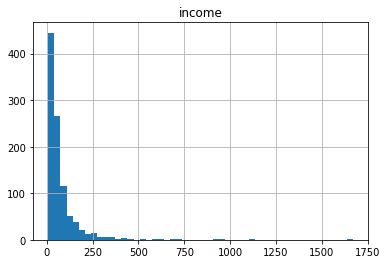

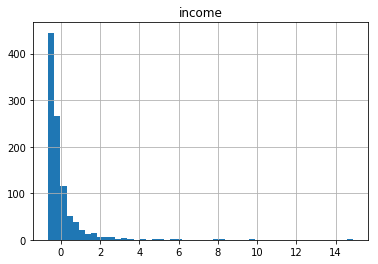

In [51]:
## Let's visualize what's the difference before and after standardization
df3 = pd.DataFrame(X_s,
                columns=['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside']) # convert numpy array into data frame
df.hist('income', bins=50) # Original data
df3.hist('income', bins=50) # Data after standardization

In [52]:
## Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_s, y, test_size=0.2, random_state = 4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 11) (800, 1)
Test set: (200, 11) (200, 1)


<h3>K nearest neighbor (KNN)</h3>

In [53]:
# ref: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
from sklearn.neighbors import KNeighborsClassifier

# Start from k = 4 ... Choose 4 nearest neighbors as classification criteria
k = 4
KNR = KNeighborsClassifier(n_neighbors=k)
KNR.fit(X_train,y_train.ravel()) # Model training
y_predict = KNR.predict(X_test) # Prediction
y_predict[:5]

array([1, 1, 3, 2, 4])

In [57]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, KNR.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_predict))

Train set Accuracy:  0.5475
Test set Accuracy:  0.32


### Choose optimum number of nearest neighbors

In [70]:
## Search k = 1 - 10: choose the k value with the highest acccuracy
accuracy = 0
k_opt = 0
for k in range(1,11):
    KNR = KNeighborsClassifier(n_neighbors=k)
    KNR.fit(X_train,y_train.ravel())
    y_predict = KNR.predict(X_test)
    accuracy_op = metrics.accuracy_score(y_test, y_predict)
    if accuracy_op > accuracy:
        accuracy = accuracy_op
        k_opt = k
print('Optimum k:',k_opt)
print('Accuracy:', accuracy_op)

Optimum k: 9
Accuracy: 0.33


Text(0, 0.5, 'Accuracy')

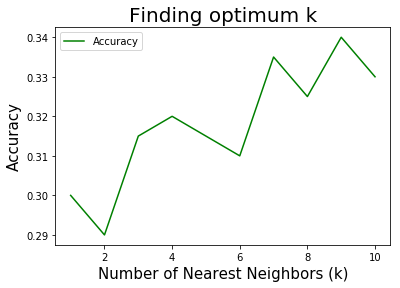

In [83]:
## Visualize how accuracy change with number of nearest neighbors!
L = []
for k in range(1,11):
    KNR = KNeighborsClassifier(n_neighbors=k)
    KNR.fit(X_train,y_train.ravel())
    y_predict = KNR.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_predict)
    L.append(accuracy)

plt.plot(range(1,11), np.array(L), c='g', label = 'Accuracy')
plt.legend()
plt.title('Finding optimum k', size = 20)
plt.xlabel('Number of Nearest Neighbors (k)', size = 15)
plt.ylabel('Accuracy',size = 15)